# ETH, SOL, MATIC, ADA ,LUNA, AVAX
## 40-20-10-10-10-10

In [8]:
from pycoingecko import CoinGeckoAPI
import pandas_datareader as web
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import minimize
from scipy.stats import norm
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from polygon import WebSocketClient, CRYPTO_CLUSTER
from polygon import RESTClient
from datetime import datetime
import quandl


In [9]:
sol_df = pd.read_csv('./data/coincodex/solana_2020-12-1_2022-1-17.csv')
sol_df['Date'] = pd.to_datetime(sol_df['Date'])
sol_df.set_index('Date',inplace=True)
sol_df = sol_df.iloc[::-1]
sol_df = sol_df[sol_df.index >= datetime(2020,12,1)]
sol_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-12-01,1.962367,2.124009,1.932501,1.977516,3.660476e+07,9.317730e+07
2020-12-02,1.971593,2.172160,1.958971,2.112355,4.113504e+07,9.605753e+07
2020-12-03,2.114955,2.215764,2.080785,2.098405,5.240107e+07,9.900875e+07
2020-12-04,2.098405,2.110675,1.841711,1.856668,3.959888e+07,9.232912e+07
2020-12-05,1.851515,1.977514,1.827409,1.977440,3.075995e+07,8.849150e+07
...,...,...,...,...,...,...
2022-01-12,140.227900,152.942365,138.487796,151.644100,2.327960e+09,4.515453e+10
2022-01-13,151.525600,157.315077,145.866507,146.143700,2.907038e+09,4.703158e+10
2022-01-14,145.835000,150.435737,142.296100,146.287610,2.880095e+09,4.601520e+10


In [10]:
avax_df = pd.read_csv('./data/coincodex/avalanche_2020-12-1_2022-1-17.csv')
avax_df['Date'] = pd.to_datetime(avax_df['Date'])
avax_df.set_index('Date',inplace=True)
avax_df = avax_df.iloc[::-1]
avax_df = avax_df[avax_df.index >= datetime(2020,12,1)]
avax_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-12-01,3.704887,3.816191,3.511738,3.576271,3.049215e+07,8.937501e+07
2020-12-02,3.561117,3.844096,3.529078,3.745825,3.153232e+07,9.129669e+07
2020-12-03,3.738596,3.889555,3.723324,3.819472,2.743838e+07,9.302110e+07
2020-12-04,3.820087,3.865357,3.516727,3.556966,2.436822e+07,9.053740e+07
2020-12-05,3.534045,3.718005,3.513630,3.630332,2.445545e+07,8.940219e+07
...,...,...,...,...,...,...
2022-01-12,89.535700,96.522283,88.942000,95.857500,1.156957e+09,2.271101e+10
2022-01-13,95.980700,96.996574,89.663700,89.676900,1.163556e+09,2.287382e+10
2022-01-14,89.491900,91.560474,87.444841,90.260713,1.024667e+09,2.196741e+10


In [11]:
eth_df = pd.read_csv('./data/coincodex/ethereum_2018-12-1_2022-1-17.csv')
eth_df['Date'] = pd.to_datetime(eth_df['Date'])
eth_df.set_index('Date',inplace=True)
eth_df = eth_df.iloc[::-1]
eth_df = eth_df[eth_df.index >= datetime(2020,12,1)]
eth_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-12-01,616.183534,634.754677,573.516677,589.814467,2.780131e+10,6.856145e+10
2020-12-02,586.970964,602.820207,578.508054,598.357253,2.929685e+10,6.742433e+10
2020-12-03,598.537314,621.269532,588.649832,616.904853,1.884975e+10,6.886717e+10
2020-12-04,616.551824,618.836053,569.723831,571.978333,1.857875e+10,6.789766e+10
2020-12-05,568.823975,596.047597,563.491212,595.548506,1.865798e+10,6.679529e+10
...,...,...,...,...,...,...
2022-01-12,3239.918200,3409.925100,3215.343755,3374.303800,2.211066e+10,3.934373e+11
2022-01-13,3373.881300,3409.041571,3248.202399,3256.141500,2.203296e+10,3.965815e+11
2022-01-14,3245.768700,3334.329197,3202.761300,3314.714162,1.903904e+10,3.903704e+11


In [12]:
matic_df = pd.read_csv('./data/coincodex/matic-network_2019-12-1_2022-1-17.csv')
matic_df['Date'] = pd.to_datetime(matic_df['Date'])
matic_df.set_index('Date',inplace=True)
matic_df = matic_df.iloc[::-1]
matic_df = matic_df[matic_df.index >= datetime(2020,12,1)]
matic_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-12-01,0.019603,0.020060,0.018155,0.018725,3.137358e+07,9.137390e+07
2020-12-02,0.018653,0.019466,0.018419,0.019348,2.647399e+07,9.097363e+07
2020-12-03,0.019362,0.020940,0.019056,0.020795,2.639941e+07,9.452948e+07
2020-12-04,0.020795,0.021043,0.018748,0.018869,3.198054e+07,9.522180e+07
2020-12-05,0.018793,0.019663,0.018384,0.019663,2.902304e+07,9.110158e+07
...,...,...,...,...,...,...
2022-01-12,2.358916,2.441087,2.311362,2.387033,2.538726e+09,1.165257e+10
2022-01-13,2.395786,2.430676,2.244977,2.267512,2.090970e+09,1.164781e+10
2022-01-14,2.260520,2.347063,2.189995,2.339803,1.753179e+09,1.128620e+10


In [13]:
ada_df = pd.read_csv('./data/coincodex/cardano_2018-12-1_2022-1-17.csv')
ada_df['Date'] = pd.to_datetime(ada_df['Date'])
ada_df.set_index('Date',inplace=True)
ada_df = ada_df.iloc[::-1]
ada_df = ada_df[ada_df.index >= datetime(2020,12,1)]
ada_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-12-01,0.172047,0.173593,0.148293,0.156136,1.725691e+09,5.149124e+09
2020-12-02,0.155848,0.159587,0.151384,0.158604,1.464832e+09,4.923297e+09
2020-12-03,0.158782,0.167663,0.156116,0.164295,9.251652e+08,5.073393e+09
2020-12-04,0.164265,0.164374,0.147370,0.148866,9.289801e+08,4.959975e+09
2020-12-05,0.148313,0.161347,0.147003,0.159815,8.733234e+08,4.931230e+09
...,...,...,...,...,...,...
2022-01-12,1.186455,1.306466,1.186455,1.303143,1.518278e+09,3.921443e+10
2022-01-13,1.305550,1.350301,1.235559,1.236217,2.265930e+09,4.037356e+10
2022-01-14,1.230540,1.306331,1.223607,1.288240,2.107726e+09,3.968948e+10


In [14]:
luna_terra_df = pd.read_csv('./data/coincodex/luna_2020-12-1_2022-1-17.csv')
luna_terra_df['Date'] = pd.to_datetime(luna_terra_df['Date'])
luna_terra_df.set_index('Date',inplace=True)
luna_terra_df = luna_terra_df.iloc[::-1]
luna_terra_df = luna_terra_df[luna_terra_df.index >= datetime(2020,12,1)]
luna_terra_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-12-01,0.395484,0.425683,0.382684,0.389358,2.883559e+06,1.537108e+08
2020-12-02,0.389144,0.407204,0.382617,0.406560,2.197633e+06,1.512835e+08
2020-12-03,0.407661,0.500521,0.407661,0.500521,4.356896e+06,1.725738e+08
2020-12-04,0.501514,0.506210,0.451157,0.452620,8.032839e+06,1.835933e+08
2020-12-05,0.451275,0.507713,0.447554,0.507713,4.309684e+06,1.849394e+08
...,...,...,...,...,...,...
2022-01-12,72.733900,82.941200,71.822500,82.391900,9.076688e+08,2.743757e+10
2022-01-13,82.016300,83.823768,77.558741,78.292500,1.087269e+09,2.895020e+10
2022-01-14,78.185900,82.904873,75.924637,81.729617,9.857812e+08,2.861373e+10


In [15]:
#ETH, SOL, FTM, ADA ,LUNA, AVAX
#40-20-10-10-10-10¶
portfolio_six_coins =['eth','sol','matic','ada','luna','avax']
portfolio_six_weights=[0.40,0.20,0.10,0.10,0.10,.10]
sum(portfolio_six_weights)

1.0

In [16]:
portfolio_df = pd.concat([eth_df['Close'],sol_df['Close'],matic_df['Close'],ada_df['Close'],luna_terra_df['Close'], avax_df['Close']],axis=1)
portfolio_df.columns = portfolio_six_coins
portfolio_df

,eth,sol,matic,ada,luna,avax
Date,,,,,,
2020-12-01,589.814467,1.977516,0.018725,0.156136,0.389358,3.576271
2020-12-02,598.357253,2.112355,0.019348,0.158604,0.406560,3.745825
2020-12-03,616.904853,2.098405,0.020795,0.164295,0.500521,3.819472
2020-12-04,571.978333,1.856668,0.018869,0.148866,0.452620,3.556966
2020-12-05,595.548506,1.977440,0.019663,0.159815,0.507713,3.630332
...,...,...,...,...,...,...
2022-01-12,3374.303800,151.644100,2.387033,1.303143,82.391900,95.857500
2022-01-13,3256.141500,146.143700,2.267512,1.236217,78.292500,89.676900
2022-01-14,3314.714162,146.287610,2.339803,1.288240,81.729617,90.260713


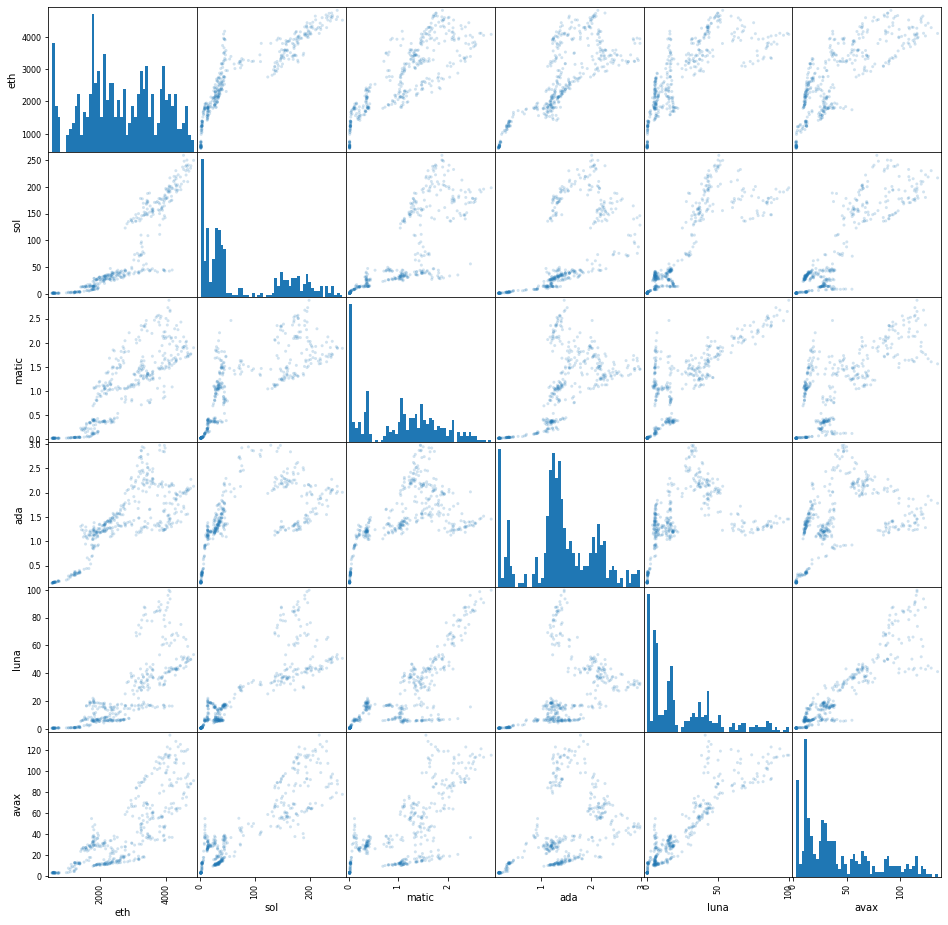

In [17]:
scatter_matrix(portfolio_df, figsize=(16,16),alpha=0.2,hist_kwds={'bins':50});

In [18]:
portfolio_df.pct_change(1).mean()

eth      0.005687
sol      0.013984
matic    0.016353
ada      0.007491
luna     0.018151
avax     0.011993
dtype: float64

In [19]:
portfolio_df.pct_change(1).corr()

,eth,sol,matic,ada,luna,avax
eth,1.000000,0.495412,0.556213,0.619428,0.466989,0.467794
sol,0.495412,1.000000,0.377341,0.390905,0.453674,0.409007
matic,0.556213,0.377341,1.000000,0.527986,0.371950,0.458446
ada,0.619428,0.390905,0.527986,1.000000,0.373673,0.582144
luna,0.466989,0.453674,0.371950,0.373673,1.000000,0.420739
avax,0.467794,0.409007,0.458446,0.582144,0.420739,1.000000


In [20]:
portfolio_log_returns = np.log(portfolio_df/portfolio_df.shift(1))
portfolio_log_returns.head()

,eth,sol,matic,ada,luna,avax
Date,,,,,,
2020-12-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-02,0.014380,0.065962,0.032730,0.015684,0.043231,0.046321
2020-12-03,0.030527,-0.006626,0.072128,0.035254,0.207918,0.019470
2020-12-04,-0.075614,-0.122394,-0.097204,-0.098613,-0.100597,-0.071204
2020-12-05,0.040382,0.063019,0.041224,0.070971,0.114864,0.020416


In [21]:
portfolio_log_returns.mean()

eth      0.004229
sol      0.010498
matic    0.011738
ada      0.005350
luna     0.013163
avax     0.007909
dtype: float64

In [22]:
# Annulized for time period
portfolio_log_returns.cov() * 365

,eth,sol,matic,ada,luna,avax
eth,1.061969,0.859549,1.090139,0.825810,0.969595,0.906466
sol,0.859549,2.488453,1.182471,0.830483,1.456190,1.182787
matic,1.090139,1.182471,3.169592,1.254433,1.363319,1.521746
ada,0.825810,0.830483,1.254433,1.533726,0.963630,1.263161
luna,0.969595,1.456190,1.363319,0.963630,3.438396,1.470322
avax,0.906466,1.182787,1.521746,1.263161,1.470322,2.870634


In [23]:
portfolio_six_weights = portfolio_six_weights/np.sum(portfolio_six_weights)
portfolio_six_weights, sum(portfolio_six_weights)

(array([0.4, 0.2, 0.1, 0.1, 0.1, 0.1]), 1.0)

In [24]:
expected_return = np.sum(portfolio_log_returns.mean() * portfolio_six_weights * 365)
expected_return


2.776640643612998

In [25]:
expected_volatility = np.sqrt(np.dot(portfolio_six_weights.T, np.dot(portfolio_log_returns.cov() * 365, portfolio_six_weights)))
expected_volatility

1.078552232349449

In [26]:
sharpe_ratio = expected_return / expected_volatility
sharpe_ratio

2.5744146276203446

In [27]:
# monte carlo 
    
TOTAL_RUNS = 100000
all_weights = np.zeros((TOTAL_RUNS,len(portfolio_six_weights)))
all_returns = np.zeros(TOTAL_RUNS)
all_vols = np.zeros(TOTAL_RUNS)
all_sharpes = np.zeros(TOTAL_RUNS)

for ind in range(TOTAL_RUNS):
    w = np.array(np.random.random(len(portfolio_six_weights)))
    w = w/np.sum(w)
    all_weights[ind,:] = w
    
    all_returns[ind] = np.sum(portfolio_log_returns.mean() * w * 365)
    
    all_vols[ind] = np.sqrt(np.dot(w.T, np.dot(portfolio_log_returns.cov() * 365, w)))
    
    all_sharpes[ind] = all_returns[ind] / all_vols[ind]

In [28]:
all_sharpes.max()

3.1222237053251325

In [29]:
all_sharpes.argmax()

97642

In [30]:
max_sr_ret = all_returns[int(all_sharpes.argmax())]
max_sr_vol = all_vols[int(all_sharpes.argmax())]

In [31]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(portfolio_log_returns.mean() * weights) * 365
    vol = np.sqrt(np.dot(weights.T, np.dot(portfolio_log_returns.cov() * 365, weights)))
    sr = ret / vol
    return np.array([ret,vol,sr])

def negative_sharpe(weights):
    return -1 * get_ret_vol_sr(weights)[2]

def check_sum(weights):
    return np.sum(weights) - 1

In [32]:
 constraints = {
                    'type': 'eq',
                    'fun': check_sum             
                  }

In [33]:
bounds = tuple((0,1) for _ in range(len(portfolio_six_weights)))
bounds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [34]:
init_guess = portfolio_six_weights
init_guess

array([0.4, 0.2, 0.1, 0.1, 0.1, 0.1])

In [35]:
opt_results = minimize(fun=negative_sharpe,
                      x0=init_guess,
                      method='SLSQP',
                       bounds = bounds,
                       constraints= constraints
                      )
opt_results

     fun: -3.1252721671870387
     jac: array([ 4.74359691e-01, -1.30474567e-04, -1.43378973e-04,  2.47951627e-01,
        2.50428915e-04,  1.91847086e-01])
 message: 'Optimization terminated successfully.'
    nfev: 49
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.00000000e+00, 3.19188269e-01, 3.27099002e-01, 3.27934882e-17,
       3.53712730e-01, 3.46999869e-17])

In [36]:
# efficient frontier - highest expected return, lowest risk possible for given expected return
frontier_y = np.linspace(2,5,1000)

In [37]:
def minimize_vol(weights):
    return get_ret_vol_sr(weights)[1]

In [38]:
frontier_vol = []

for possible_return in frontier_y:
    cons = ({'type':'eq','fun': check_sum}, 
            {'type':'eq','fun':lambda w: get_ret_vol_sr(w)[0] - possible_return})
    result = minimize(minimize_vol, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
    frontier_vol.append(result['fun'])

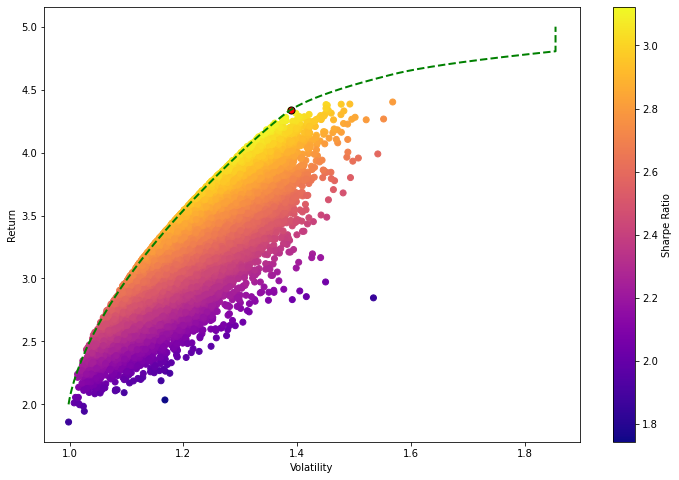

In [39]:
plt.figure(figsize=(12,8))
plt.scatter(all_vols,all_returns,c=all_sharpes,cmap='plasma')
#plt.hlines(y=0.01,xmin=0,xmax=2)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_vol, frontier_y,'g--',linewidth=2)
plt.scatter(max_sr_vol,max_sr_ret, c='red',s=50,edgecolors='black')